### Step 1: Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Library for data splitting
from sklearn.model_selection import train_test_split
#Library for data standardization
from sklearn.preprocessing import StandardScaler
#Libraries for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Libraries for Decision Tree Classifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
#Library for SVM
from sklearn import svm

### Step 2: Import Dataset

In [2]:
cd C:/Users/alan-/Desktop/

C:\Users\alan-\Desktop


In [3]:
df= pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Step 3: Data Exploration

In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Step 4: Feature Selection

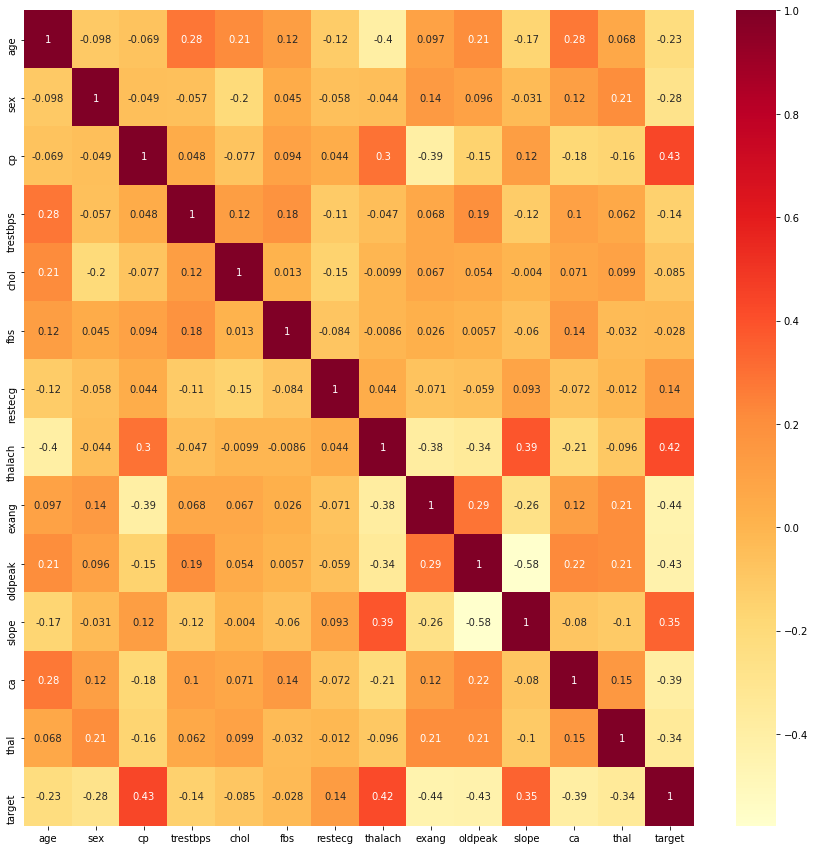

In [8]:
#Using heatmap to show feature selection
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlOrRd")
plt.show(g)

The feature exang is highly correlated with target followed by cp, oldpeak, thalack, ca, slope and thal.

### Step 5: Data Splitting

In [9]:
#Choose the 7 most important features
x = df[['cp', 'thalach', 'exang', 'oldpeak', 'ca','slope','thal']]
y = df['target']

#Splitting the dataset into 60% Train set and 40% Test set
x_train60,x_test40,y_train60,y_test40 = train_test_split(x,y,test_size=0.40,random_state= 0)
#Splitting the dataset into 70% Train set and 30% Test set
x_train70,x_test30,y_train70,y_test30 = train_test_split(x,y,test_size=0.30,random_state= 0)
#Splitting the dataset into 80% Train set and 20% Test set
x_train80,x_test20,y_train80,y_test20 = train_test_split(x,y,test_size=0.20,random_state= 0)

### Step 6: Feature Standardization
Feature Standardization is done after data splitting and not before to avoid information leakage.

In [10]:
sc = StandardScaler()
x_train60 = sc.fit_transform(x_train60)
x_test40 = sc.transform(x_test40)
x_train70 = sc.fit_transform(x_train70)
x_test30 = sc.transform(x_test30)
x_train80= sc.fit_transform(x_train80)
x_test20 = sc.transform(x_test20)

### Step 7: Building the Machine Learning Models

### K-Nearest Neighbors (KNN)
#### Finding the suitable k value

In [11]:
# Fitting classifier to the 60% Train set
k_range = range(1,30)
scores1 = {}
scores_list1 = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train60, y_train60)
    y_pred = classifier.predict(x_test40)
    scores1[k] = metrics.accuracy_score(y_test40, y_pred)
    scores_list1.append(metrics.accuracy_score(y_test40, y_pred))
print(scores1)

# Fitting classifier to the 70% Train set
scores2 = {}
scores_list2 = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train70, y_train70)
    y_pred = classifier.predict(x_test30)
    scores2[k] = metrics.accuracy_score(y_test30, y_pred)
    scores_list2.append(metrics.accuracy_score(y_test30, y_pred))
print(scores2)

# Fitting classifier to the 80% Train set
scores3 = {}
scores_list3 = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train80, y_train80)
    y_pred = classifier.predict(x_test20)
    scores3[k] = metrics.accuracy_score(y_test20, y_pred)
    scores_list3.append(metrics.accuracy_score(y_test20, y_pred))
print(scores3)

{1: 0.8032786885245902, 2: 0.7950819672131147, 3: 0.8114754098360656, 4: 0.8278688524590164, 5: 0.8032786885245902, 6: 0.8278688524590164, 7: 0.7950819672131147, 8: 0.8114754098360656, 9: 0.819672131147541, 10: 0.8278688524590164, 11: 0.8278688524590164, 12: 0.819672131147541, 13: 0.8114754098360656, 14: 0.8114754098360656, 15: 0.7868852459016393, 16: 0.7950819672131147, 17: 0.7868852459016393, 18: 0.7950819672131147, 19: 0.7704918032786885, 20: 0.7950819672131147, 21: 0.7704918032786885, 22: 0.7868852459016393, 23: 0.7622950819672131, 24: 0.7622950819672131, 25: 0.7622950819672131, 26: 0.7786885245901639, 27: 0.7868852459016393, 28: 0.7868852459016393, 29: 0.7868852459016393}
{1: 0.8241758241758241, 2: 0.7802197802197802, 3: 0.8021978021978022, 4: 0.8681318681318682, 5: 0.8241758241758241, 6: 0.8571428571428571, 7: 0.8241758241758241, 8: 0.8131868131868132, 9: 0.7912087912087912, 10: 0.8021978021978022, 11: 0.8131868131868132, 12: 0.8241758241758241, 13: 0.8131868131868132, 14: 0.8131

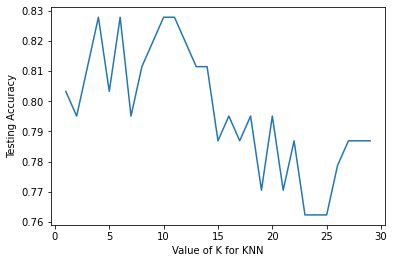

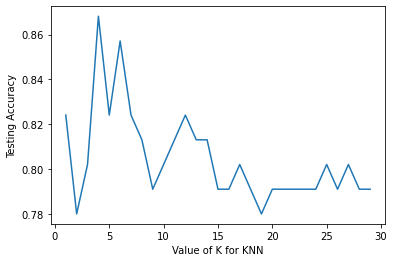

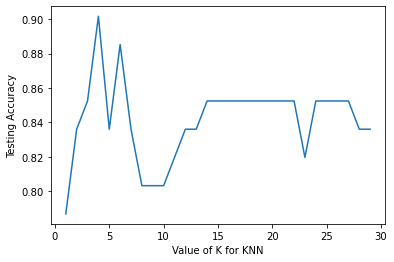

In [12]:
#plot the relationship between K and the testing accuracy for 3 different division of data
p = plt.plot(k_range,scores_list1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show(p)
q = plt.plot(k_range,scores_list2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show(q)
r = plt.plot(k_range,scores_list3)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show(r)

In [13]:
#I choose 4 as my k_value
knn1 = KNeighborsClassifier(n_neighbors = 4)
knn1.fit(x_train60,y_train60)
knn2 = KNeighborsClassifier(n_neighbors = 4)
knn2.fit(x_train70,y_train70)
knn3 = KNeighborsClassifier(n_neighbors = 4)
knn3.fit(x_train80,y_train80)

KNeighborsClassifier(n_neighbors=4)

In [14]:
# Predicting the Test set results
pred_knn1 = knn1.predict(x_test40)
pred_knn2 = knn2.predict(x_test30)
pred_knn3 = knn3.predict(x_test20)

trainpred_knn1 = knn1.predict(x_train60)
trainpred_knn2 = knn2.predict(x_train70)
trainpred_knn3 = knn3.predict(x_train80)

In [15]:
#Evaluate model
print("60% Train & 40% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test40, pred_knn1)))
print('Accuracy:', str.format('{0:.5f}',accuracy_score(y_test40, pred_knn1)))
print("\n70% Train & 30% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test30, pred_knn2)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test30, pred_knn2)))
print("\n80% Train & 20% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test20, pred_knn3)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test20, pred_knn3)))

60% Train & 40% Test
Confusion Matrix:
 [[45 14]
 [ 7 56]]
Accuracy: 0.82787

70% Train & 30% Test
Confusion Matrix:
 [[36  8]
 [ 4 43]]
Accuracy: 0.86813

80% Train & 20% Test
Confusion Matrix:
 [[25  2]
 [ 4 30]]
Accuracy: 0.90164


In [16]:
#Check overfitting
print("Overfitting Checking for KNN")
print("60% Train & 40% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test40, pred_knn1)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train60, trainpred_knn1)))
print("\n70% Train & 30% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test30, pred_knn2)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train70, trainpred_knn2)))
print("\n80% Train & 20% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test20, pred_knn3)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train80, trainpred_knn3)))

Overfitting Checking for KNN
60% Train & 40% Test
Accuracy for test set: 0.82787
Accuracy for train set: 0.86188

70% Train & 30% Test
Accuracy for test set: 0.86813
Accuracy for train set: 0.85849

80% Train & 20% Test
Accuracy for test set: 0.90164
Accuracy for train set: 0.86777


### Decision Tree
#### Finding the suitable max_depth value

In [17]:
max_depth_range = list(range(1, 7))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train60, y_train60)
    score = clf.score(x_test40, y_test40)
    accuracy.append(score)
print(accuracy)

accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train70, y_train70)
    score = clf.score(x_test30, y_test30)
    accuracy.append(score)
print(accuracy)

accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train80, y_train80)
    score = clf.score(x_test20, y_test20)
    accuracy.append(score)
print(accuracy)

[0.7131147540983607, 0.7213114754098361, 0.7950819672131147, 0.8032786885245902, 0.7786885245901639, 0.7295081967213115]
[0.7692307692307693, 0.7362637362637363, 0.8131868131868132, 0.7472527472527473, 0.7802197802197802, 0.8021978021978022]
[0.7868852459016393, 0.7540983606557377, 0.8524590163934426, 0.8360655737704918, 0.8524590163934426, 0.8360655737704918]


In [18]:
dtc1 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state = 0)
dtc2 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state = 0)
dtc3 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state = 0)

In [19]:
dtc1.fit(x_train60,y_train60)
dtc2.fit(x_train70,y_train70)
dtc3.fit(x_train80,y_train80)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
# Predicting the Test set results
pred_dtc1 = dtc1.predict(x_test40)
pred_dtc2 = dtc2.predict(x_test30)
pred_dtc3 = dtc3.predict(x_test20)

trainpred_dtc1 = dtc1.predict(x_train60)
trainpred_dtc2 = dtc2.predict(x_train70)
trainpred_dtc3 = dtc3.predict(x_train80)

In [21]:
#Evaluate model
print("60% Train & 40% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test40, pred_dtc1)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test40, pred_dtc1)))
print("\n70% Train & 30% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test30, pred_dtc2)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test30, pred_dtc2)))
print("\n80% Train & 20% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test20, pred_dtc3)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test20, pred_dtc3)))

60% Train & 40% Test
Confusion Matrix:
 [[42 17]
 [ 8 55]]
Accuracy: 0.79508

70% Train & 30% Test
Confusion Matrix:
 [[32 12]
 [ 5 42]]
Accuracy: 0.81319

80% Train & 20% Test
Confusion Matrix:
 [[21  6]
 [ 3 31]]
Accuracy: 0.85246


In [22]:
#Check overfitting
print("Overfitting Checking for Decision Tree")
print("60% Train & 40% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test40, pred_dtc1)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train60, trainpred_dtc1)))
print("\n70% Train & 30% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test30, pred_dtc2)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train70, trainpred_dtc2)))
print("\n80% Train & 20% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test20, pred_dtc3)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train80, trainpred_dtc3)))

Overfitting Checking for Decision Tree
60% Train & 40% Test
Accuracy for test set: 0.79508
Accuracy for train set: 0.86188

70% Train & 30% Test
Accuracy for test set: 0.81319
Accuracy for train set: 0.86792

80% Train & 20% Test
Accuracy for test set: 0.85246
Accuracy for train set: 0.85124


### Support Vector Machine

In [23]:
svm1 = svm.SVC(random_state = 0)
svm2 = svm.SVC(random_state = 0)
svm3 = svm.SVC(random_state = 0)

In [24]:
svm1.fit(x_train60,y_train60)
svm2.fit(x_train70,y_train70)
svm3.fit(x_train80,y_train80)

SVC(random_state=0)

In [25]:
# Predicting the Test set results
pred_svm1 = svm1.predict(x_test40)
pred_svm2 = svm2.predict(x_test30)
pred_svm3 = svm3.predict(x_test20)

trainpred_svm1 = svm1.predict(x_train60)
trainpred_svm2 = svm2.predict(x_train70)
trainpred_svm3 = svm3.predict(x_train80)

In [26]:
#Evaluate model
print("60% Train & 40% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test40, pred_svm1)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test40, pred_svm1)))
print("\n70% Train & 30% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test30, pred_svm2)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test30, pred_svm2)))
print("\n80% Train & 20% Test")
print('Confusion Matrix:\n',  format(confusion_matrix(y_test20, pred_svm3)))
print('Accuracy:', str.format('{0:.5f}', accuracy_score(y_test20, pred_svm3)))

60% Train & 40% Test
Confusion Matrix:
 [[42 17]
 [ 6 57]]
Accuracy: 0.81148

70% Train & 30% Test
Confusion Matrix:
 [[31 13]
 [ 4 43]]
Accuracy: 0.81319

80% Train & 20% Test
Confusion Matrix:
 [[20  7]
 [ 2 32]]
Accuracy: 0.85246


In [27]:
#Check overfitting
print("Overfitting Checking for SVM")
print("60% Train & 40% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test40, pred_svm1)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train60, trainpred_svm1)))
print("\n70% Train & 30% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test30, pred_svm2)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train70, trainpred_svm2)))
print("\n80% Train & 20% Test")
print('Accuracy for test set:', str.format('{0:.5f}', accuracy_score(y_test20, pred_svm3)))
print('Accuracy for train set:', str.format('{0:.5f}', accuracy_score(y_train80, trainpred_svm3)))

Overfitting Checking for SVM
60% Train & 40% Test
Accuracy for test set: 0.81148
Accuracy for train set: 0.90055

70% Train & 30% Test
Accuracy for test set: 0.81319
Accuracy for train set: 0.88208

80% Train & 20% Test
Accuracy for test set: 0.85246
Accuracy for train set: 0.87603


### Classification report for 3 different model

In [28]:
print("Classification Report for KNN Model with 80% Train & 20% Test", '\n')
print(classification_report(y_test20, pred_knn3))

Classification Report for KNN Model with 80% Train & 20% Test 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.94      0.88      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [29]:
print("Classification Report for Decision Tree Model with 80% Train & 20% Test", '\n')
print(classification_report(y_test20, pred_dtc3))

Classification Report for Decision Tree Model with 80% Train & 20% Test 

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [30]:
print("Classification Report for SVM Model with 80% Train & 20% Test", '\n')
print(classification_report(y_test20, pred_svm3))

Classification Report for SVM Model with 80% Train & 20% Test 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.82      0.94      0.88        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61

